In [8]:
import os
os.environ["USE_TF"] = "0" 
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np

In [7]:
from nltk import sent_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhruvkulshrestha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else 'cpu'

In [4]:
device 

'cpu'

In [5]:
def load_model(device):
    theme_classifier = pipeline(
        "zero-shot-classification",
        model=model_name,
        framework="pt",
        device=device
    )

    return theme_classifier

In [6]:
theme_classifier = load_model(device)

/opt/anaconda3/envs/projectsentiment/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [15]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121255874633789,
  0.4749995470046997,
  0.08781760931015015,
  0.04500087350606918,
  0.020133085548877716,
  0.012040643952786922,
  0.004292479250580072,
  0.002817174419760704]}

In [16]:
files = glob('../data/Subtitles/*.ass')

In [17]:
files[:5]

['../data/Subtitles/Naruto Season 4 - 94.ass',
 '../data/Subtitles/Naruto Season 4 - 80.ass',
 '../data/Subtitles/Naruto Season 2 - 32.ass',
 '../data/Subtitles/Naruto Season 8 - 185.ass',
 '../data/Subtitles/Naruto Season 8 - 191.ass']

In [18]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines =  [ ",".join(line.split(',')[9:])  for line in lines ]

In [19]:
lines[:2]

['We are Fighting Dreamers aiming high\n',
 "Fighting Dreamers\\Ndon't care what people think about them\n"]

In [20]:
lines = [ line.replace('\\N',' ') for line in lines]

In [21]:
lines[:2]

['We are Fighting Dreamers aiming high\n',
 "Fighting Dreamers don't care what people think about them\n"]

In [22]:
" ".join(lines[:10])

"We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map?\n An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!)\n"

In [23]:
int(files[0].split('-')[-1].split('.')[0].strip())

94

In [24]:
import pandas as pd

def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(dataset_path+'/*.ass')

    scripts=[]
    episode_num=[]

    for path in subtitles_paths:

        #Read Lines
        with open(path,'r') as file:
            lines = file.readlines()
            lines = lines[27:]
            lines =  [ ",".join(line.split(',')[9:])  for line in lines ]
        
        lines = [ line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())

        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode":episode_num, "script":scripts })
    return df

In [25]:
dataset_path = "../data/Subtitles"
df = load_subtitles_dataset(dataset_path)

In [26]:
df.head()

,episode,script
0,94,We are Fighting Dreamers aiming high\n Fightin...
1,80,We are Fighting Dreamers aiming high\n Fightin...
2,32,"Press down hard on the gas\n That’s right, the..."
3,185,"Rock away your existence,\n Shouting that you ..."
4,191,"Rock away your existence,\n Shouting that you ..."


In [27]:
script = df.iloc[0]['script']

In [28]:
script

'We are Fighting Dreamers aiming high\n Fighting Dreamers don\'t care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else\'s map?\n An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!)\n There\'s nothing to lose, so let\'s GO!!!\n We are Fighting Dreamers aiming high\n Fighting Dreamers don\'t care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn) We\'re gonna do it and do our best!\n Right here right now (Bang) Hit it straight like a line drive!\n Right here right now (Burn) We\'re gonna do it and do our best! BANG!\n My bod

In [29]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

["We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh!",
 'Just go my way\n Right here right now (Bang) Hit it straight like a line drive!',
 "Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map?"]

In [30]:
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [31]:
script_batches[:2]

["We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map? An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!) There's nothing to lose, so let's GO!!! We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! BANG! My body movements have final

In [32]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [33]:
theme_output

[{'sequence': "We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn)\n Down a difficult road filled with endless struggles\n Where do you think you are going following someone else's map? An insightful crow comes along to tear up the map\n Now open your eyes and take a look at the truth (Yeah!) There's nothing to lose, so let's GO!!! We are Fighting Dreamers aiming high\n Fighting Dreamers don't care what people think about them\n Fighting Dreamers follow what they believe\n Oli Oli Oli Oh! Just go my way\n Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! Right here right now (Bang) Hit it straight like a line drive! Right here right now (Burn) We're gonna do it and do our best! BANG! My body movemen

In [34]:
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [35]:
themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

In [36]:
themes

{'dialogue': 0.9550971388816833,
 'battle': 0.9633690118789673,
 'self development': 0.9140432178974152,
 'betrayal': 0.875093400478363,
 'sacrifice': 0.9146701991558075,
 'hope': 0.5141076892614365,
 'friendship': 0.3752851150929928,
 'love': 0.13130560889840126}

In [37]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [38]:
df = df.head(2)

In [39]:
df

,episode,script
0,94,We are Fighting Dreamers aiming high\n Fightin...
1,80,We are Fighting Dreamers aiming high\n Fightin...


In [40]:
output_themes = df['script'].apply(get_themes_inference)

In [41]:
output_themes

0    {'dialogue': 0.9550971388816833, 'battle': 0.9...
1    {'battle': 0.9364226162433624, 'sacrifice': 0....
Name: script, dtype: object

In [42]:
theme_df = pd.DataFrame(output_themes.tolist())

In [43]:
theme_df

,dialogue,battle,self development,betrayal,sacrifice,hope,friendship,love
0,0.955097,0.963369,0.914043,0.875093,0.914670,0.514108,0.375285,0.131306
1,0.930689,0.936423,0.696009,0.593103,0.751553,0.385098,0.311898,0.050575


In [44]:
df

,episode,script
0,94,We are Fighting Dreamers aiming high\n Fightin...
1,80,We are Fighting Dreamers aiming high\n Fightin...


In [45]:
df[theme_df.columns] = theme_df
df


,episode,script,dialogue,battle,self development,betrayal,sacrifice,hope,friendship,love
0,94,We are Fighting Dreamers aiming high\n Fightin...,0.955097,0.963369,0.914043,0.875093,0.914670,0.514108,0.375285,0.131306
1,80,We are Fighting Dreamers aiming high\n Fightin...,0.930689,0.936423,0.696009,0.593103,0.751553,0.385098,0.311898,0.050575


In [46]:
df = df.drop('dialogue',axis=1)

In [47]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,battle,1.899792
1,self development,1.610052
2,betrayal,1.468197
3,sacrifice,1.666224
4,hope,0.899206
5,friendship,0.687183
6,love,0.181881


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

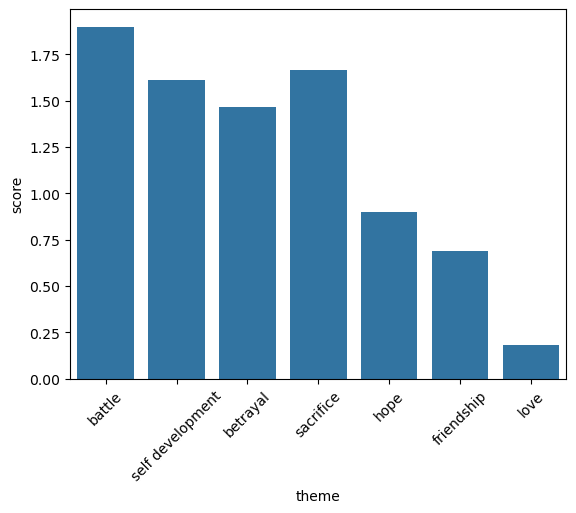

In [49]:
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()